In [1]:
emotion_to_label = {
    'admiration': 0, 'amusement': 1, 'anger': 2, 'annoyance': 3, 'approval': 4,
    'caring': 5, 'confusion': 6, 'curiosity': 7, 'desire': 8, 'disappointment': 9,
    'disapproval': 10, 'disgust': 11, 'embarrassment': 12, 'excitement': 13,
    'fear': 14, 'gratitude': 15, 'grief': 16, 'joy': 17, 'love': 18,
    'nervousness': 19, 'optimism': 20, 'pride': 21, 'realization': 22,
    'relief': 23, 'remorse': 24, 'sadness': 25, 'surprise': 26, 'neutral': 27
}

In [2]:
import pandas as pd
data = pd.read_csv('goemotions_2.0.csv')

C:\Users\Xuran\AppData\Local\Temp\ipykernel_32148\2419202109.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('goemotions_2.0.csv')


In [3]:
data.head()

,text,id,intensity1,intensity2,Emotion,example_very_unclear,admiration,amusement,anger,annoyance,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,3.5,3.5,sadness,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,-1.0,-1.0,NaN,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,2.0,2.0,neutral,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,1.0,1.0,love,False,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,0.0,0.0,neutral,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
emodata = data.drop(['id'], axis=1)

In [5]:
emodata.head(1016)

,text,intensity1,intensity2,Emotion,example_very_unclear,admiration,amusement,anger,annoyance,approval,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,3.5,3.5,sadness,False,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,-1.0,-1.0,NaN,True,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",2.0,2.0,neutral,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,1.0,1.0,love,False,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0.0,0.0,neutral,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,Glad you liked it!,3.0,3.0,NaN,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,GG haha 😉,2.0,2.0,NaN,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013,"I have a boobs but a penis, it’s quite the emb...",1.5,2.0,NaN,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1014,"Thanks, I'll keep that in mind for sure. After...",1.5,2.0,NaN,False,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
print(emodata.shape)
emodata = emodata.head(1016)
emodata['label'] = emodata.loc[:, emotion_to_label.keys()].idxmax(axis=1).map(emotion_to_label)
emodata = emodata[~emodata['example_very_unclear']]
emodata = emodata[(emodata['intensity1'].notna()) & (emodata['intensity2'].notna())]
emodata['intavg'] = (emodata['intensity1'] + emodata['intensity2']) / 2
#emodata = emodata[['text', 'label','intavg']]
emodata = emodata[['text','intavg']]
print(emodata)

(70000, 33)
                                                   text  intavg
0                                       That game hurt.    3.50
2        You do right, if you don't care then fuck 'em!    2.00
3                                    Man I love reddit.    1.00
4     [NAME] was nowhere near them, he was by the Fa...    0.00
5     Right? Considering it’s such an important docu...    4.00
...                                                 ...     ...
1011                                 Glad you liked it!    3.00
1012                                          GG haha 😉    2.00
1013  I have a boobs but a penis, it’s quite the emb...    1.75
1014  Thanks, I'll keep that in mind for sure. After...    1.75
1015  Ah. That’s where I left it. Now where are the ...    1.25

[993 rows x 2 columns]


1. Text Data Pre-Processing

1.1 Removing emojis and emoticons

In [7]:
import re

def clean_text(text):
  # Define the characters to remove
  characters_to_remove = "\"'"  # Single and double quotation marks
  words_to_remove = []  # list of words to remove
  text = text.replace(characters_to_remove, '')
  for word in words_to_remove:
    text = text.replace(word, '')
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text) # no emoji
  return text


# Apply the cleaning function to the column
emodata['cleaned_text'] = emodata['text'].apply(clean_text)

In [8]:
emodata = emodata[['cleaned_text','intavg']]
print(emodata)

                                           cleaned_text  intavg
0                                       That game hurt.    3.50
2        You do right, if you don't care then fuck 'em!    2.00
3                                    Man I love reddit.    1.00
4     [NAME] was nowhere near them, he was by the Fa...    0.00
5     Right? Considering it’s such an important docu...    4.00
...                                                 ...     ...
1011                                 Glad you liked it!    3.00
1012                                           GG haha     2.00
1013  I have a boobs but a penis, it’s quite the emb...    1.75
1014  Thanks, I'll keep that in mind for sure. After...    1.75
1015  Ah. That’s where I left it. Now where are the ...    1.25

[993 rows x 2 columns]


In [9]:
arr = emodata.to_numpy()


x_train = arr[:894,0]
y_train = arr[:894,1].astype('float32')
x_test = arr[894:,0]
y_test = arr[894:,1].astype('float32')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# print(x_train[0][:50])
# print(y_train)
# print(x_test)
# print(y_test)

(894,)
(894,)
(99,)
(99,)


In [10]:
!pip install tqdm boto3 requests regex sentencepiece sacremoses

In [11]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [12]:
!pip install importlib_metadata

In [13]:
import torch

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-cased')
#indexed_tokens = tokenizer.encode(x_train, x_test, add_special_tokens=True)
train_tokenized = tokenizer(x_train.tolist(), padding=True, truncation=True, return_tensors="pt")

test_tokenized = tokenizer(x_test.tolist(), padding=True, truncation=True, return_tensors="pt")

Using cache found in C:\Users\Xuran/.cache\torch\hub\huggingface_pytorch-transformers_main
C:\Users\Xuran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
from torch.utils.data import DataLoader, TensorDataset

# Convert tokenized text and labels to PyTorch tensors
train_dataset = TensorDataset(train_tokenized['input_ids'], train_tokenized['attention_mask'], torch.tensor(y_train))
test_dataset = TensorDataset(test_tokenized['input_ids'], test_tokenized['attention_mask'], torch.tensor(y_test))

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [15]:
premodel = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-cased')

Using cache found in C:\Users\Xuran/.cache\torch\hub\huggingface_pytorch-transformers_main


In [35]:
import torch.nn as nn

class BertRegression(nn.Module):
    def __init__(self, premodel):
        super(BertRegression, self).__init__()
        self.bert = premodel
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier1 = torch.nn.Linear(768, 1)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = outputs[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        pooler = self.classifier1(pooler)
        return pooler.squeeze()

In [36]:
import torch.optim as optim

model = BertRegression(premodel)
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-5)
loss_list = []
curr_loss_list = []

# Train the model
for epoch in range(3):  # Number of epochs
    #print("Epoch:",epoch)
    curr_loss_list = []
    model.train()
    for input_ids, attention_mask, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(input_ids.to(device, dtype = torch.long), attention_mask.to(device, dtype = torch.long))
        loss = criterion(outputs, labels.to(device, dtype = torch.float))  # Squeeze the output to match the shape of labels
        loss.backward()
        loss_list.append(loss.item())
        curr_loss_list.append(loss.item())
        optimizer.step()
    print('training loss of epoch',epoch+1,':',sum(curr_loss_list)/len(curr_loss_list))

training loss of epoch 1 : 2.1849732313837325
training loss of epoch 2 : 0.28704768419265747
training loss of epoch 3 : 0.11861097386905126


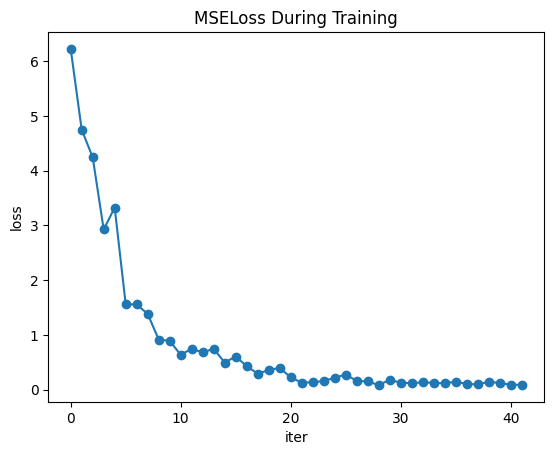

In [37]:
import matplotlib.pyplot as plt

plt.plot(loss_list, marker='o')
plt.title('MSELoss During Training')
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

In [38]:
# Set the model to evaluation mode
model.eval()

# Initialize lists to store losses and outputs
all_losses = []
all_outputs = []

with torch.no_grad():
    # Iterate over the test dataset without batching
    for input_ids, attention_mask, labels in test_loader:
        # Get the i-th example from the test dataset
        #input_ids, attention_mask, labels = test_dataset[i]

        # Forward pass through the model to obtain predictions
        #outputs = model(input_ids.unsqueeze(0).to(device, dtype = torch.long), attention_mask.unsqueeze(0).to(device, dtype = torch.long))  # Add a batch dimension

        # Calculate the loss for the current example
        #loss = criterion(outputs.squeeze(), labels.unsqueeze(0).to(device, dtype = torch.float))  # Add a batch dimension for labels
        outputs = model(input_ids.to(device, dtype = torch.long), attention_mask.to(device, dtype = torch.long))
        loss = criterion(outputs.squeeze(), labels.to(device, dtype = torch.float))
        # Append the loss and outputs for the current example
        all_losses.append(loss.item())
        all_outputs.append(outputs)

# Convert the list of losses and outputs to tensors
#all_losses = torch.tensor(all_losses)
all_outputs = torch.cat(all_outputs, dim=0)

# Calculate the average loss across all examples
average_loss = sum(all_losses)/len(all_losses)

# Print the average loss and outputs
print("Average loss:", average_loss)
# print("All outputs:", all_outputs)

Average loss: 0.42185840223516735


In [20]:
print(len(all_outputs))

99


In [39]:
correct = 0
for i in range(len(all_outputs)):
  diff = float(all_outputs[i])-y_test[i]
  if abs(diff)<=1:
    correct+=1
print("Acc:",correct/len(all_outputs))

Acc: 0.8686868686868687


In [41]:
#Work on custom sentences:
# Custom sentences
sentence1 = "This is a test sentence."
sentence2 = "Another example sentence."
sentences = ["It was 90 degrees","I like that car","I hate you so much!"]

# Tokenize the custom sentences
inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

# Forward pass through the model to obtain predictions
with torch.no_grad():
    inputs.pop('token_type_ids', None)
    outputs = model(**inputs.to(device))

# Get the predicted scores (regression output)
predicted_scores = outputs.squeeze()
print("Predicted scores:", predicted_scores)

Predicted scores: tensor([1.0734, 2.4590, 4.3020], device='cuda:0')
